# cf-python exercises 2
----
## Subspaces and coordinates

In [1]:
# import the cf package
import cf

In [2]:
# Read the field from file ncas_data/IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc
f = cf.read('ncas_data/IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc')[0]
f

<CF Field: air_temperature(time(120), latitude(145), longitude(192)) K>

## Subspace by indices
https://ncas-cms.github.io/cf-python/tutorial.html#subspacing-by-index

In [3]:
# Create a new field containing the X-Y field for just the first time
# (use the field's "subspace" method with square brackets and put
#  index 0 in the time axis position)
g = f[0]
print(g)

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(1), latitude(145), longitude(192)) K
Cell methods    : time(1): mean (interval: 30 minutes)
Dimension coords: time(1) = [1959-12-16 12:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m



In [4]:
# Set up in-line images and import cf-plot
%matplotlib inline

import cfplot as cfp

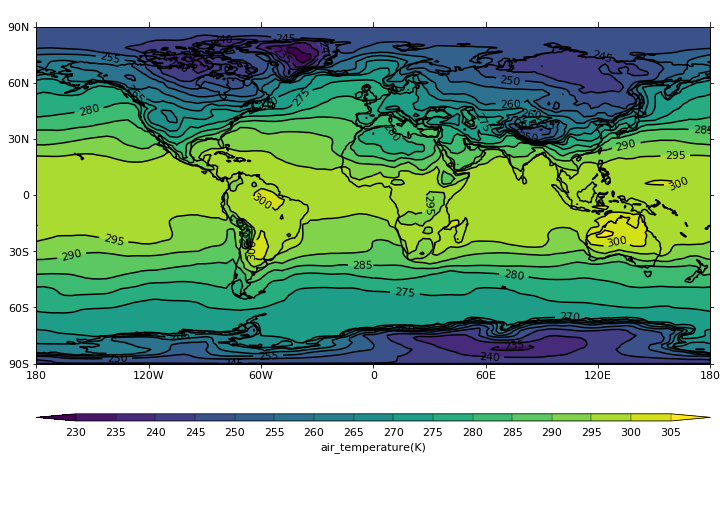

In [5]:
# Plot the 2-d X-Y field
# (use the cfp.con function of cfplot)
cfp.con(g)

In [6]:
# Create a new field containing the X-Y field for just the last time
# (use the index -1 in the time axis position)
g = f[-1]
print(g)

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(1), latitude(145), longitude(192)) K
Cell methods    : time(1): mean (interval: 30 minutes)
Dimension coords: time(1) = [1969-11-16 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m



In [7]:
# Create a new field containing with the first 10 latitude rows
# (use the index : in the time position and the index 0:10 the latitude axis position)
g = f[:, 0:10]
print(g)

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(120), latitude(10), longitude(192)) K
Cell methods    : time(120): mean (interval: 30 minutes)
Dimension coords: time(120) = [1959-12-16 12:00:00, ..., 1969-11-16 00:00:00] 365_day
                : latitude(10) = [-90.0, ..., -78.75] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m



In [8]:
# Create a new field omitting the first time
# (use the index 1: in the time axis position)
g = f[1:]
print(g)

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(119), latitude(145), longitude(192)) K
Cell methods    : time(119): mean (interval: 30 minutes)
Dimension coords: time(119) = [1960-01-16 12:00:00, ..., 1969-11-16 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m



## Subspace by date-time
https://ncas-cms.github.io/cf-python/tutorial.html#susbaces-in-time

In [9]:
# Create a new field containing just the months of February
# (use field's "subspace" method with round brackets and use the cf.month function
#  to define February as month 2)
g = f.subspace(T=cf.month(2))
print(g)

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(10), latitude(145), longitude(192)) K
Cell methods    : time(10): mean (interval: 30 minutes)
Dimension coords: time(10) = [1960-02-15 00:00:00, ..., 1969-02-15 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m



https://ncas-cms.github.io/cf-python/method/cf.Field.coordinate.html

In [10]:
# Get the coordinates of the new field and print the coordinate object
# (pass the string 'T' to the field's "coordinate" method and display the result)
t = g.coordinate('T')
t

<CF DimensionCoordinate: time(10) days since 1850-1-1 00:00:00 365_day>

In [11]:
# Print the time coordinate values and their units
# (use the coordinate object's "units" and "array" attributes)
print(t.units)
print(t.array)

days since 1850-1-1 00:00:00
[40195. 40560. 40925. 41290. 41655. 42020. 42385. 42750. 43115. 43480.]


In [12]:
# Print the time coordinate values as date-times, rather than days since a reference time
# (use the coordinate object's "datetime_array" attribute)
print(t.datetime_array)

[cftime.DatetimeNoLeap(1960-02-15 00:00:00)
 cftime.DatetimeNoLeap(1961-02-15 00:00:00)
 cftime.DatetimeNoLeap(1962-02-15 00:00:00)
 cftime.DatetimeNoLeap(1963-02-15 00:00:00)
 cftime.DatetimeNoLeap(1964-02-15 00:00:00)
 cftime.DatetimeNoLeap(1965-02-15 00:00:00)
 cftime.DatetimeNoLeap(1966-02-15 00:00:00)
 cftime.DatetimeNoLeap(1967-02-15 00:00:00)
 cftime.DatetimeNoLeap(1968-02-15 00:00:00)
 cftime.DatetimeNoLeap(1969-02-15 00:00:00)]


In [13]:
# Print the time coordinates' cell bounds
# (uget the bounds from the coordinate object's "bounds" attribute, and
#  print the "datetime_array" attribute of the bounds)
print(t.bounds.datetime_array)

[[cftime.DatetimeNoLeap(1960-02-01 00:00:00)
  cftime.DatetimeNoLeap(1960-03-01 00:00:00)]
 [cftime.DatetimeNoLeap(1961-02-01 00:00:00)
  cftime.DatetimeNoLeap(1961-03-01 00:00:00)]
 [cftime.DatetimeNoLeap(1962-02-01 00:00:00)
  cftime.DatetimeNoLeap(1962-03-01 00:00:00)]
 [cftime.DatetimeNoLeap(1963-02-01 00:00:00)
  cftime.DatetimeNoLeap(1963-03-01 00:00:00)]
 [cftime.DatetimeNoLeap(1964-02-01 00:00:00)
  cftime.DatetimeNoLeap(1964-03-01 00:00:00)]
 [cftime.DatetimeNoLeap(1965-02-01 00:00:00)
  cftime.DatetimeNoLeap(1965-03-01 00:00:00)]
 [cftime.DatetimeNoLeap(1966-02-01 00:00:00)
  cftime.DatetimeNoLeap(1966-03-01 00:00:00)]
 [cftime.DatetimeNoLeap(1967-02-01 00:00:00)
  cftime.DatetimeNoLeap(1967-03-01 00:00:00)]
 [cftime.DatetimeNoLeap(1968-02-01 00:00:00)
  cftime.DatetimeNoLeap(1968-03-01 00:00:00)]
 [cftime.DatetimeNoLeap(1969-02-01 00:00:00)
  cftime.DatetimeNoLeap(1969-03-01 00:00:00)]]


In [14]:
# Create a new field that containing the months of February to April
# (use the cf.wi function to define a range of months (2 to 4) and pass this as the
#  argument to the cf.month function)
h = f.subspace(T=cf.month(cf.wi(2, 4)))
print(h)

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(30), latitude(145), longitude(192)) K
Cell methods    : time(30): mean (interval: 30 minutes)
Dimension coords: time(30) = [1960-02-15 00:00:00, ..., 1969-04-16 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m



In [15]:
# Check its time coordinate values
print(h.coord('T').datetime_array)

[cftime.DatetimeNoLeap(1960-02-15 00:00:00)
 cftime.DatetimeNoLeap(1960-03-16 12:00:00)
 cftime.DatetimeNoLeap(1960-04-16 00:00:00)
 cftime.DatetimeNoLeap(1961-02-15 00:00:00)
 cftime.DatetimeNoLeap(1961-03-16 12:00:00)
 cftime.DatetimeNoLeap(1961-04-16 00:00:00)
 cftime.DatetimeNoLeap(1962-02-15 00:00:00)
 cftime.DatetimeNoLeap(1962-03-16 12:00:00)
 cftime.DatetimeNoLeap(1962-04-16 00:00:00)
 cftime.DatetimeNoLeap(1963-02-15 00:00:00)
 cftime.DatetimeNoLeap(1963-03-16 12:00:00)
 cftime.DatetimeNoLeap(1963-04-16 00:00:00)
 cftime.DatetimeNoLeap(1964-02-15 00:00:00)
 cftime.DatetimeNoLeap(1964-03-16 12:00:00)
 cftime.DatetimeNoLeap(1964-04-16 00:00:00)
 cftime.DatetimeNoLeap(1965-02-15 00:00:00)
 cftime.DatetimeNoLeap(1965-03-16 12:00:00)
 cftime.DatetimeNoLeap(1965-04-16 00:00:00)
 cftime.DatetimeNoLeap(1966-02-15 00:00:00)
 cftime.DatetimeNoLeap(1966-03-16 12:00:00)
 cftime.DatetimeNoLeap(1966-04-16 00:00:00)
 cftime.DatetimeNoLeap(1967-02-15 00:00:00)
 cftime.DatetimeNoLeap(1967-03-1

In [16]:
# Print the time coordinates of a new field that containing only the months of February and November
# (connect two cf.month calls with |, the python "bitwise or" character)
h = f.subspace(T=cf.month(2) | cf.month(11))
print(h.coord('T').datetime_array)

[cftime.DatetimeNoLeap(1960-02-15 00:00:00)
 cftime.DatetimeNoLeap(1960-11-16 00:00:00)
 cftime.DatetimeNoLeap(1961-02-15 00:00:00)
 cftime.DatetimeNoLeap(1961-11-16 00:00:00)
 cftime.DatetimeNoLeap(1962-02-15 00:00:00)
 cftime.DatetimeNoLeap(1962-11-16 00:00:00)
 cftime.DatetimeNoLeap(1963-02-15 00:00:00)
 cftime.DatetimeNoLeap(1963-11-16 00:00:00)
 cftime.DatetimeNoLeap(1964-02-15 00:00:00)
 cftime.DatetimeNoLeap(1964-11-16 00:00:00)
 cftime.DatetimeNoLeap(1965-02-15 00:00:00)
 cftime.DatetimeNoLeap(1965-11-16 00:00:00)
 cftime.DatetimeNoLeap(1966-02-15 00:00:00)
 cftime.DatetimeNoLeap(1966-11-16 00:00:00)
 cftime.DatetimeNoLeap(1967-02-15 00:00:00)
 cftime.DatetimeNoLeap(1967-11-16 00:00:00)
 cftime.DatetimeNoLeap(1968-02-15 00:00:00)
 cftime.DatetimeNoLeap(1968-11-16 00:00:00)
 cftime.DatetimeNoLeap(1969-02-15 00:00:00)
 cftime.DatetimeNoLeap(1969-11-16 00:00:00)]


In [17]:
# Create a new field that containing only the time 1965-12-16 12:00
# (use the cf.dt function to define the required date-time)
g = f.subspace(T=cf.dt('1965-12-16 12:00'))
print(g)

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(1), latitude(145), longitude(192)) K
Cell methods    : time(1): mean (interval: 30 minutes)
Dimension coords: time(1) = [1965-12-16 12:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m



In [18]:
# Create a new field that containing only all times after or including 1965-12-1
# (use the cf.dt function inside the cf.ge function)
g = f.subspace(T=cf.ge(cf.dt(1965, 12, 1)))
print(g)

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(48), latitude(145), longitude(192)) K
Cell methods    : time(48): mean (interval: 30 minutes)
Dimension coords: time(48) = [1965-12-16 12:00:00, ..., 1969-11-16 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m



In [19]:
# Find years of each time coordinate value 
# (print the "array" of the coordinate object's "year" attribute)
years = g.coord('T').year
print(years.array)

[1965 1966 1966 1966 1966 1966 1966 1966 1966 1966 1966 1966 1966 1967
 1967 1967 1967 1967 1967 1967 1967 1967 1967 1967 1967 1968 1968 1968
 1968 1968 1968 1968 1968 1968 1968 1968 1968 1969 1969 1969 1969 1969
 1969 1969 1969 1969 1969 1969]


In [20]:
# Find all of the days of the month of each time coordinate
# (print the array of the coordinate object's "day" attribute)
days = g.coord('T').day
print(days.array)

[16 16 15 16 16 16 16 16 16 16 16 16 16 16 15 16 16 16 16 16 16 16 16 16
 16 16 15 16 16 16 16 16 16 16 16 16 16 16 15 16 16 16 16 16 16 16 16 16]
